In [1]:
import numpy as np

# load data & target
data = np.load('data.npy')
target = np.load('target.npy')

In [2]:
print(data.shape) # 50x50->285 (flatten)
print(target.shape)

(285, 2500)
(285,)


In [3]:
import collections
print(collections.Counter(target)) # label count

Counter({1: 113, 2: 91, 0: 81})


In [4]:
from sklearn.svm import SVC # import SVM algorithm
from sklearn.decomposition import PCA # import PCA algorithm
from sklearn.pipeline import make_pipeline # the function needed to create a pipeline is taken

pca = PCA(n_components=150,whiten=True,random_state=42) # create PCA 
svc = SVC(kernel='rbf') # create SVM

model=make_pipeline(pca,svc) # create pipeline

In [5]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1) # 10%

In [6]:
model.fit(train_data,train_target) # traning

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [7]:
predicted_target = model.predict(test_data) #testing

In [8]:
# get accuracy score
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_target,predicted_target)
print(acc)

0.9310344827586207


In [9]:
# get classification report
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Barack Obama','Donald Trump','George W Bush']))

               precision    recall  f1-score   support

 Barack Obama       1.00      0.60      0.75         5
 Donald Trump       0.92      1.00      0.96        11
George W Bush       0.93      1.00      0.96        13

     accuracy                           0.93        29
    macro avg       0.95      0.87      0.89        29
 weighted avg       0.94      0.93      0.92        29



In [10]:
# get confusion matrix
# pip install --user --upgrade scikit-learn (type command in cmd)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix = confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 3  1  1]
 [ 0 11  0]
 [ 0  0 13]]


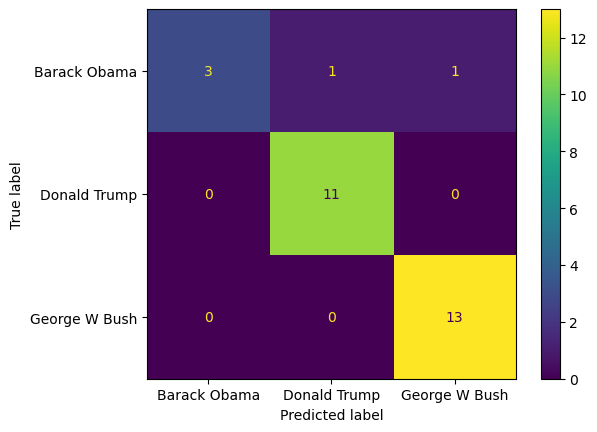

In [11]:
# display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Barack Obama','Donald Trump','George W Bush'])
disp.plot()

In [38]:
# save model
import joblib

joblib.dump(model,'SVM-Face Recognition.sav')

['SVM-Face Recognition.sav']